<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/pandas/2025_02_18_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas DataFrames

* chatgpt, deepl, bard, llama, copilot ?  all use numpy and pandas

Pandas is like numpy but with the columns have names, like spreadsheets, it's like a database

In [2]:
import pandas as pd


df=pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/pandas/pandasdata.csv")

df


,StudentName,Grade,Major,Advisor,StudentNumber
0,Fred,100,math,Mr Watts,123
1,Sam,92,English,Ms Smith,456
2,Sally,84,computers,Mr Watts,789
3,Susan,93,math,Ms Smith,101
4,Arthur,74,biology,Mr Watts,102


In [3]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [4]:
df.columns

Index(['StudentName', 'Grade', 'Major', 'Advisor', 'StudentNumber'], dtype='object')

In [6]:
# series

df['StudentName']


,StudentName
0,Fred
1,Sam
2,Sally
3,Susan
4,Arthur


In [13]:
# inplace means modify itself
# not every pandas operation lets you use inplace

df.set_index(df['StudentNumber'],inplace=True)

# other way would be to create a dataframe.  of course you can use the same name
# so that it basically updates iself
df = df.set_index(df['StudentNumber'])

In [15]:
df.index

Index([123, 456, 789, 101, 102], dtype='int64', name='StudentNumber')

In [16]:
df.columns

Index(['StudentName', 'Grade', 'Major', 'Advisor', 'StudentNumber'], dtype='object')

In [8]:
StudentName = df['StudentName']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 123 to 102
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentName    5 non-null      object
 1   Grade          5 non-null      int64 
 2   Major          5 non-null      object
 3   Advisor        5 non-null      object
 4   StudentNumber  5 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 240.0+ bytes


In [10]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [18]:
b = pd.DataFrame({
     "cars": ['mercedes', 'bmw'],
     "colors" : ['white', 'black']
})

b



,cars,colors
0,mercedes,white
1,bmw,black


In [20]:
df

,StudentName,Grade,Major,Advisor,StudentNumber
StudentNumber,,,,,
123,Fred,100,math,Mr Watts,123
456,Sam,92,English,Ms Smith,456
789,Sally,84,computers,Mr Watts,789
101,Susan,93,math,Ms Smith,101
102,Arthur,74,biology,Mr Watts,102


In [21]:
df['Grade'].describe()

,Grade
count,5.000000
mean,88.600000
std,9.939819
min,74.000000
25%,84.000000
50%,92.000000
75%,93.000000
max,100.000000


<Axes: xlabel='StudentNumber'>

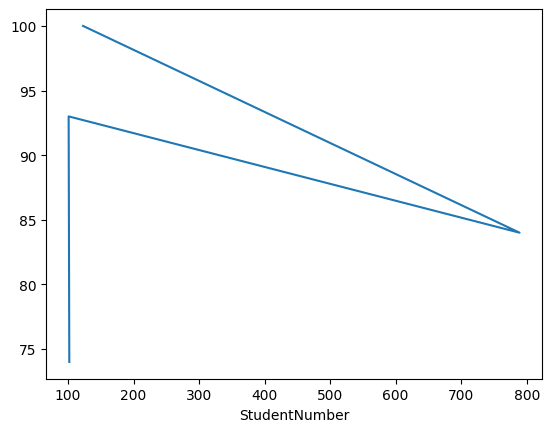

In [23]:
# that since pandas includes matplotlib we chart it

df['Grade'].plot()


In [24]:
grades=df['Grade'].to_numpy()


<BarContainer object of 5 artists>

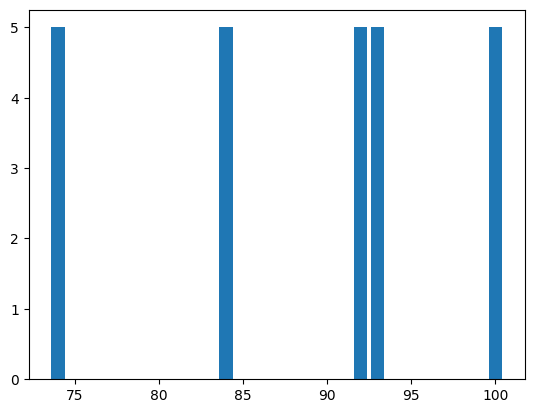

In [26]:
import matplotlib.pyplot as plt

plt.bar(grades,height=5)

In [29]:
df.loc[df['Advisor'] == 'Mr Watts']

,StudentName,Grade,Major,Advisor,StudentNumber
StudentNumber,,,,,
123,Fred,100,math,Mr Watts,123
789,Sally,84,computers,Mr Watts,789
102,Arthur,74,biology,Mr Watts,102


In [30]:
df.loc[df['Advisor'] == 'Mr Watts'].sort_values(by='Grade')

,StudentName,Grade,Major,Advisor,StudentNumber
StudentNumber,,,,,
102,Arthur,74,biology,Mr Watts,102
789,Sally,84,computers,Mr Watts,789
123,Fred,100,math,Mr Watts,123


In [31]:
df.iloc[0:3]

,StudentName,Grade,Major,Advisor,StudentNumber
StudentNumber,,,,,
123,Fred,100,math,Mr Watts,123
456,Sam,92,English,Ms Smith,456
789,Sally,84,computers,Mr Watts,789


#Searching

In [37]:

from datetime import date
import pandas as pd


# here we create a dataframe.  We want to have a date as a column that we can search on using an index.
# so we set it up like this

df = pd.DataFrame({
      "agent": "Fred",
      "sales": [100, 200, 300],
      "date": [date.fromisoformat("2024-04-11"), date.fromisoformat("2024-04-12"), date.fromisoformat("2024-04-13")]

})

df



,agent,sales,date
0,Fred,100,2024-04-11
1,Fred,200,2024-04-12
2,Fred,300,2024-04-13


In [33]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   agent   3 non-null      object
 1   sales   3 non-null      int64 
 2   date    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [40]:
# change date from object to datetime object

# using to_datetime

df['date']=pd.to_datetime(df['date'])


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   agent   3 non-null      object        
 1   sales   3 non-null      int64         
 2   date    3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 204.0+ bytes


In [43]:
df.set_index(("date"),inplace=True)

In [44]:
df.index

DatetimeIndex(['2024-04-11', '2024-04-12', '2024-04-13'], dtype='datetime64[ns]', name='date', freq=None)

In [36]:
df.set_index(pd_date("date"),inplace=True)

KeyError: "None of ['date'] are in the columns"

In [45]:
file="https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/pandas/DataScience_salaries_2024.csv"

df = pd.read_csv(file)

df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,MI,FT,Business Intelligence Developer,15000,USD,15000,GH,100,GH,M
14834,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [50]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df['salary'].describe()



,salary
count,14838.00
mean,165022.72
std,356235.43
min,14000.00
25%,102100.00
50%,142200.00
75%,187500.00
max,30400000.00


In [55]:
pd.set_option('display.max_rows', 200)

df.groupby("job_title")['salary'].mean()

,salary
job_title,
AI Architect,254573.21
AI Developer,134684.21
AI Engineer,163458.14
AI Product Manager,141766.67
AI Programmer,764400.86
AI Research Engineer,360871.43
AI Research Scientist,115000.00
AI Scientist,232375.00
AI Software Engineer,174100.00


In [56]:
df[df['experience_level'] == 'EN']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,2022,EN,FT,Data Scientist,6600000,HUF,17684,HU,100,HU,M
9,2022,EN,FT,Research Engineer,5500000,JPY,41809,JP,50,JP,L
11,2023,EN,FT,AI Programmer,4950806,INR,60207,IN,0,IN,S
14,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
16,2023,EN,FT,Applied Machine Learning Scientist,4000000,INR,48644,IN,100,DE,L
...,...,...,...,...,...,...,...,...,...,...,...
14831,2022,EN,FT,Research Engineer,15662,EUR,16455,RU,100,RU,M
14832,2024,EN,PT,Data Science,15000,EUR,16666,DE,50,DE,M
14835,2021,EN,FT,Machine Learning Developer,15000,USD,15000,TH,100,TH,L
14836,2022,EN,FT,Data Analyst,15000,USD,15000,ID,0,ID,L


In [58]:
df.loc[df['experience_level'] == 'EN', ['salary', 'experience_level']]

,salary,experience_level
7,6600000,EN
9,5500000,EN
11,4950806,EN
14,4450000,EN
16,4000000,EN
...,...,...
14831,15662,EN
14832,15000,EN
14835,15000,EN
14836,15000,EN


In [59]:
df.loc[(df['company_location'] == 'FR') & (df['work_year'] == 2024), ['salary', 'job_title']]


,salary,job_title
1359,244400,Analytics Engineer
1423,240000,Data Scientist
3726,187000,Data Scientist
8550,131600,Analytics Engineer
12038,90000,Data Scientist
13005,75000,Data Analyst
14105,54000,Data Analyst
14180,51550,Data Science
14209,50000,Data Scientist
14211,50000,Data Analyst


In [60]:
df.loc[(df['company_location'] == 'FR') & (df['work_year'] == 2023)].loc[:,['salary', 'job_title']]

,salary,job_title
1895,225000,Machine Learning Engineer
1901,225000,Research Engineer
3169,199000,Machine Learning Engineer
5181,168000,Research Engineer
6612,150000,AI Developer
9655,120000,AI Programmer
10518,110000,Data Engineer
11407,100000,Machine Learning Infrastructure Engineer
12125,90000,Data Engineer
13047,75000,Data Engineer


In [62]:
df.loc[0:5,['salary', 'job_title']]

,salary,job_title
0,30400000,Data Scientist
1,11000000,BI Data Analyst
2,11000000,Data Scientist
3,8500000,ML Engineer
4,7500000,Lead Machine Learning Engineer
5,7000000,ML Engineer


In [63]:
# this is iloc not loc
# so this means by index but the behavior is it starts at 0

df.iloc[1:3,1:5]

,experience_level,employment_type,job_title,salary
1,MI,FT,BI Data Analyst,11000000
2,MI,FT,Data Scientist,11000000


In [65]:
df.loc[1:3,['salary']]

,salary
1,11000000
2,11000000
3,8500000


In [68]:
academic = pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/refs/heads/master/pandas/academic_performance_dataset_V2.csv")

academic

,ID No,Prog Code,Gender,YoG,CGPA,CGPA100,CGPA200,CGPA300,CGPA400,SGPA
0,42308,ICE,Female,2010,3.23,2.88,3.48,2.62,2.90,3.13
1,70978,BCH,Female,2010,3.58,3.25,4.26,3.37,3.47,3.02
2,31602,BCH,Male,2010,2.21,1.78,1.98,1.49,2.51,2.19
3,63847,BCH,Male,2010,2.70,2.67,2.44,2.00,2.35,3.19
4,30158,BCH,Female,2010,3.88,3.61,3.69,3.63,4.58,4.24
...,...,...,...,...,...,...,...,...,...,...
3041,64106,PHYG,Female,2013,4.18,4.04,4.23,4.16,4.28,3.20
3042,96596,PHYG,Male,2013,2.91,2.36,3.35,2.87,3.02,2.03
3043,64982,PHYG,Male,2013,3.66,3.42,3.83,3.55,3.82,3.33
3044,27052,PHYG,Female,2014,4.56,4.39,4.70,4.58,4.63,3.52


# Homework

1. go to kaggle.com and download some data, preferable large

2. upload to github

3.  read into data frame using pandas

4.  print columns

5.  set index to something like and ID or date .  you want it to be unique

6.  do a group by

7.  do a loc lookup by some logic

